# BOOK RECOMMENDER SYSTEM

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
books_df = pd.read_csv("Books.csv")
ratings_df = pd.read_csv("Ratings.csv")

C:\Users\nirma\AppData\Local\Temp\ipykernel_14600\4026821937.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv("Books.csv")


In [2]:
books_df.shape

(271360, 8)

In [3]:
ratings_df.shape

(1149780, 3)

In [4]:
# Display the first few rows of the books_df dataset

In [5]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
# Display the first few rows of the ratings_df dataset

In [7]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
# checking the number of missing values

In [9]:
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
# delete all the missing values

In [11]:
books_df.dropna(inplace = True)

In [12]:
# checking the number of missing values

In [13]:
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [14]:
# Merge the datasets on ISBN
books_ratings = pd.merge(ratings_df, books_df, on='ISBN')

# Display the first few rows of the merged dataset
print(books_ratings.head())

   User-ID        ISBN  Book-Rating  \
0   276725  034545104X            0   
1   276726  0155061224            5   
2   276727  0446520802            0   
3   276729  052165615X            3   
4   276729  0521795028            6   

                                          Book-Title      Book-Author  \
0                               Flesh Tones: A Novel       M. J. Rose   
1                                   Rites of Passage       Judith Rae   
2                                       The Notebook  Nicholas Sparks   
3                                     Help!: Level 1    Philip Prowse   
4  The Amsterdam Connection : Level 4 (Cambridge ...      Sue Leather   

  Year-Of-Publication                   Publisher  \
0                2002            Ballantine Books   
1                2001                      Heinle   
2                1996                Warner Books   
3                1999  Cambridge University Press   
4                2001  Cambridge University Press   

       

In [15]:
# checking the shape of the merged dataset

In [16]:
books_ratings.shape

(1031128, 10)

In [17]:
# checking the number of duplicate values

In [18]:
books_ratings.duplicated().sum()

0

In [19]:
# checking the number of missing values of the merged dataset

In [20]:
books_ratings.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

# Exploratory Data Analysis

In [21]:
# 1.Understanding the distribution of the features available

In [22]:
# Summary statistics of the dataset
print(books_ratings.describe())

            User-ID   Book-Rating
count  1.031128e+06  1.031128e+06
mean   1.405946e+05  2.839032e+00
std    8.052485e+04  3.854147e+00
min    2.000000e+00  0.000000e+00
25%    7.041500e+04  0.000000e+00
50%    1.412100e+05  0.000000e+00
75%    2.114260e+05  7.000000e+00
max    2.788540e+05  1.000000e+01


C:\Users\nirma\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


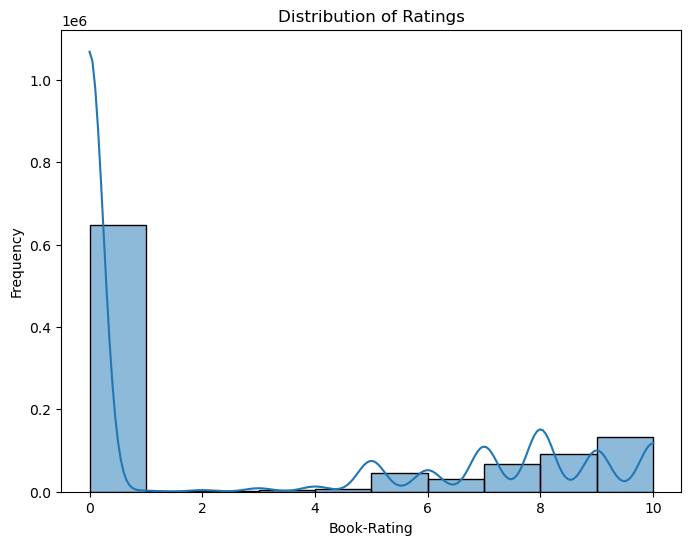

In [23]:
# Distribution of Book-ratings
plt.figure(figsize=(8, 6))
sns.histplot(books_ratings['Book-Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Book-Rating')
plt.ylabel('Frequency')
plt.show()

In [24]:
# Count the number of ratings for each book
ratings_count=books_ratings.groupby('Book-Title')['Book-Rating'].count().reset_index(name='num_ratings')

# Merge with the books_df dataframe to get Book titles
ratings_count = ratings_count.merge(books_df[['Book-Title']], on='Book-Title')

In [25]:
ratings_count.shape

(270289, 2)

In [26]:
ratings_count

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
270284,Ã?Â?lpiraten.,2
270285,Ã?Â?rger mit Produkt X. Roman.,4
270286,Ã?Â?sterlich leben.,1
270287,Ã?Â?stlich der Berge.,3


C:\Users\nirma\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


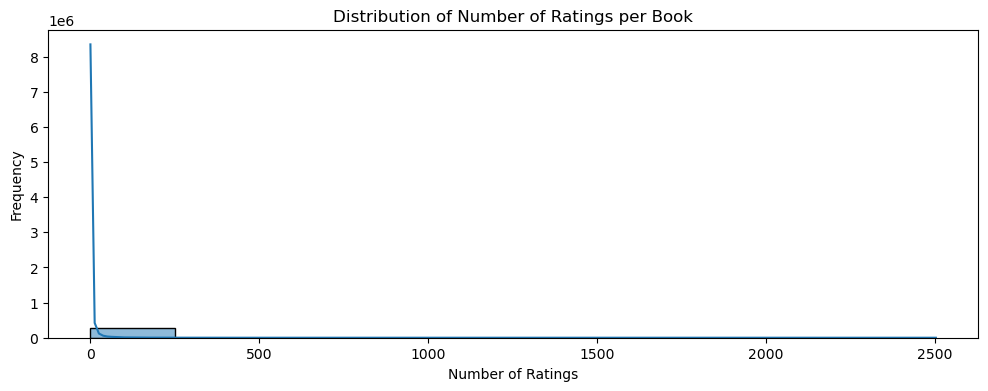

In [27]:
# distribution of the number of Book ratings
plt.figure(figsize=(12, 4))
sns.histplot(ratings_count['num_ratings'], bins=10, kde=True)
plt.title('Distribution of Number of Ratings per Book')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# POPULARITY BASED RECOMMENDED SYSTEM

In [28]:
# Finding unique users and books

In [29]:
# Number of unique users
unique_users = books_ratings['User-ID'].nunique()
print(f'Unique Users: {unique_users}')

Unique Users: 92106


In [30]:
# Number of unique Book
unique_books = books_ratings['Book-Title'].nunique()
print(f'Unique Books: {unique_books}')

Unique Books: 241065


In [31]:
# Total Book by Book-Rating
total_Books_by_ratings = books_ratings.groupby('Book-Rating')['Book-Title'].count().reset_index().rename(columns={'Book-Title': 'total_Books'})
print(total_Books_by_ratings)

    Book-Rating  total_Books
0             0       647291
1             1         1481
2             2         2375
3             3         5118
4             4         7617
5             5        45355
6             6        31687
7             7        66401
8             8        91803
9             9        60776
10           10        71224


In [32]:
# Unique ratings considered

In [33]:
# Unique ratings
unique_ratings = books_ratings['Book-Rating'].unique()
print(f'Unique Genres: {unique_ratings}')

Unique Genres: [ 0  5  3  6  7  9  8 10  1  4  2]


In [34]:
# Average rating of each books

In [35]:
# average ratings
avg_ratings=books_ratings.groupby('Book-Title')['Book-Rating'].mean().reset_index()

In [36]:
avg_ratings.rename(columns={'Book-Rating':'avg_ratings'},inplace=True)

In [37]:
avg_ratings

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241060,Ã?Â?lpiraten.,0.000000
241061,Ã?Â?rger mit Produkt X. Roman.,5.250000
241062,Ã?Â?sterlich leben.,7.000000
241063,Ã?Â?stlich der Berge.,2.666667


In [38]:
# merge ratings_count and avg_ratings dataframe

In [39]:
total_with_avg_ratings=ratings_count.merge(avg_ratings,on='Book-Title')

In [40]:
total_with_avg_ratings

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
270284,Ã?Â?lpiraten.,2,0.000000
270285,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
270286,Ã?Â?sterlich leben.,1,7.000000
270287,Ã?Â?stlich der Berge.,3,2.666667


In [41]:
total_with_avg_ratings = total_with_avg_ratings.drop_duplicates('Book-Title') 

In [42]:
popular_books=total_with_avg_ratings[total_with_avg_ratings['num_ratings']>=250]

In [43]:
popular_books=popular_books.sort_values('avg_ratings',ascending=False)

In [44]:
popular_books=popular_books.head(50)

In [45]:
popular_books.shape

(50, 3)

In [46]:
popular_books.head()

,Book-Title,num_ratings,avg_ratings
89968,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
89950,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
89978,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
89955,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
89940,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453


In [47]:
popular_books = popular_books.merge(books_df,on='Book-Title')

In [48]:
popular_books.shape

(196, 10)

In [49]:
popular_books=popular_books.drop_duplicates('Book-Title') 

In [50]:
popular_books=popular_books[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_ratings']]

In [51]:
popular_books.head()

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453


In [52]:
popular_books.shape

(50, 5)

In [53]:
popular_books = popular_books.head(20)

In [54]:
popular_books.shape

(20, 5)

# Create a popularity-based recommender system at a auther level

In [55]:
def popular_books_by_author(books_ratings, author_name, min_ratings=50, top_n=10):
    """
    Recommends the top books by a specific author based on popularity.
    
    Parameters:
        books_ratings (pd.DataFrame): DataFrame containing 'Book-Title', 'Book-Rating', and 'Book-Author'.
        author_name (str): Name of the author to filter books by.
        min_ratings (int): Minimum number of ratings a book should have to be considered.
        top_n (int): Number of top books to return.
        
    Returns:
        pd.DataFrame: A DataFrame of top books by the specified author based on popularity.
    """
    # Filter books by the specified author
    author_books = books_ratings[books_ratings['Book-Author'] == author_name]
    
    # Calculate the total number of ratings and average rating for each book by this author
    book_ratings = author_books.groupby('Book-Title').agg(
        num_ratings=('Book-Rating', 'size'),
        avg_rating=('Book-Rating', 'mean')
    ).reset_index()
    
    # Filter books with at least 'min_ratings' ratings
    popular_books = book_ratings[book_ratings['num_ratings'] >= min_ratings]
    
    # Sort by average rating and number of ratings in descending order
    popular_books = popular_books.sort_values(by=['avg_rating', 'num_ratings'], ascending=False)
    
    # Return the top 'n' books
    return popular_books.head(top_n)

In [56]:
author_name = "John Grisham"
min_ratings = 200
top_n = 5
top_books = popular_books_by_author(books_ratings, author_name, min_ratings, top_n)
print(top_books)


           Book-Title  num_ratings  avg_rating
82        The Summons          654    3.425076
73        The Partner          478    3.290795
0     A Painted House          651    3.201229
83      The Testament          615    3.173984
71  The King of Torts          214    3.158879


In [57]:
books_ratings['Book-Author'].value_counts()

Book-Author
Stephen King          10053
Nora Roberts           8429
John Grisham           6010
James Patterson        5845
Mary Higgins Clark     4777
                      ...  
W. D. Kingery             1
\Abu\""                   1
Leland Ferguson           1
Dawn Reno                 1
Joseph Delissio           1
Name: count, Length: 101584, dtype: int64

# COLLABORATIVE BASED RECOMMENDER SYSTEM

In [58]:
books_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [59]:
# user basis filter

In [60]:
user_basis_filter=books_ratings.groupby('User-ID').count()['Book-Rating']>200

In [61]:
active_users=user_basis_filter[user_basis_filter].index

In [62]:
filtered_users=books_ratings[books_ratings['User-ID'].isin(active_users)]

In [63]:
filtered_users.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1151,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...
1152,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...
1153,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...
1154,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...


In [64]:
# title basis filter

In [65]:
title_basis_filter=filtered_users.groupby('Book-Title').count()['Book-Rating']>=50

In [66]:
famous_books=title_basis_filter[title_basis_filter].index

In [67]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [68]:
final_books=filtered_users[filtered_users['Book-Title'].isin(famous_books)]

In [69]:
final_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...


In [70]:
final_books.duplicated().sum()

0

In [71]:
pivot_table=final_books.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [72]:
pivot_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [73]:
pivot_table.fillna(0,inplace=True)

In [74]:
pivot_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
# calculate the distance between points

In [76]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_score=cosine_similarity(pivot_table)
similarity_score.shape

(706, 706)

In [77]:
import numpy as np
import pandas as pd

In [78]:
def recommend(book_name):
    # index fetch
    index = np.where(pivot_table.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books_df[books_df['Book-Title'] == pivot_table.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [79]:
recommend("4 Blondes")

[['The House of the Spirits',
  'Isabel Allende',
  'http://images.amazon.com/images/P/0553273914.01.MZZZZZZZ.jpg'],
 ['Pride and Prejudice',
  'Jane Austen',
  'http://images.amazon.com/images/P/055321215X.01.MZZZZZZZ.jpg'],
 ['Pleading Guilty',
  'Scott Turow',
  'http://images.amazon.com/images/P/0446365505.01.MZZZZZZZ.jpg'],
 ['Seabiscuit',
  'LAURA HILLENBRAND',
  'http://images.amazon.com/images/P/0345465083.01.MZZZZZZZ.jpg']]

In [80]:
books_df.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [87]:
books_ratings = total_with_avg_ratings.merge(books_ratings, on = 'Book-Title')

In [88]:
books_ratings.shape

(1031128, 12)

In [90]:
books_ratings.isnull().sum()

Book-Title             0
num_ratings            0
avg_ratings            0
User-ID                0
ISBN                   0
Book-Rating            0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [81]:
import pickle
pickle.dump(popular_books,open('popular_books.pkl','wb'))
pickle.dump(pivot_table,open('pivot_table.pkl','wb'))
pickle.dump(books_df,open('books_df.pkl','wb'))
pickle.dump(similarity_score,open('similarity_score.pkl','wb'))


In [91]:
pickle.dump(books_ratings, open('books_ratings.pkl','wb'))